# Library and biblitech imports

In [ ]:
!pip install missingno

from google.colab import files
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
uploaded = files.upload()

Saving Info_BDApnea_QuironMalaga.xlsx to Info_BDApnea_QuironMalaga.xlsx
Saving OSA_DB_UPM.xlsx to OSA_DB_UPM.xlsx


# Original data visualization : Data description

In [ ]:
# Specify the file name
file_name = 'Info_BDApnea_QuironMalaga.xlsx'

# Read the Excel file into a DataFrame
df_tmp = pd.read_excel(file_name)
df_tmp.head(20)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P0006,QMH6,si_codigos,si,16,hombre,NaN,2.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P0007,QMH7,si_codigos,si,16,hombre,NaN,34.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P0008,QMH8,si_codigos,si,16,hombre,NaN,60.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P0009,QMH9,si_codigos,si,16,hombre,NaN,22.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P0010,QMH10,si_codigos,si,16,hombre,NaN,11.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df_tmp.columns)

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Peso',
       'Talla', 'IMC', 'Edad', 'PerCervical', 'Fumador', 'Fumador.1',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')


# Data Preprocessing

### Missing and incompatible data visualisation

<Axes: >

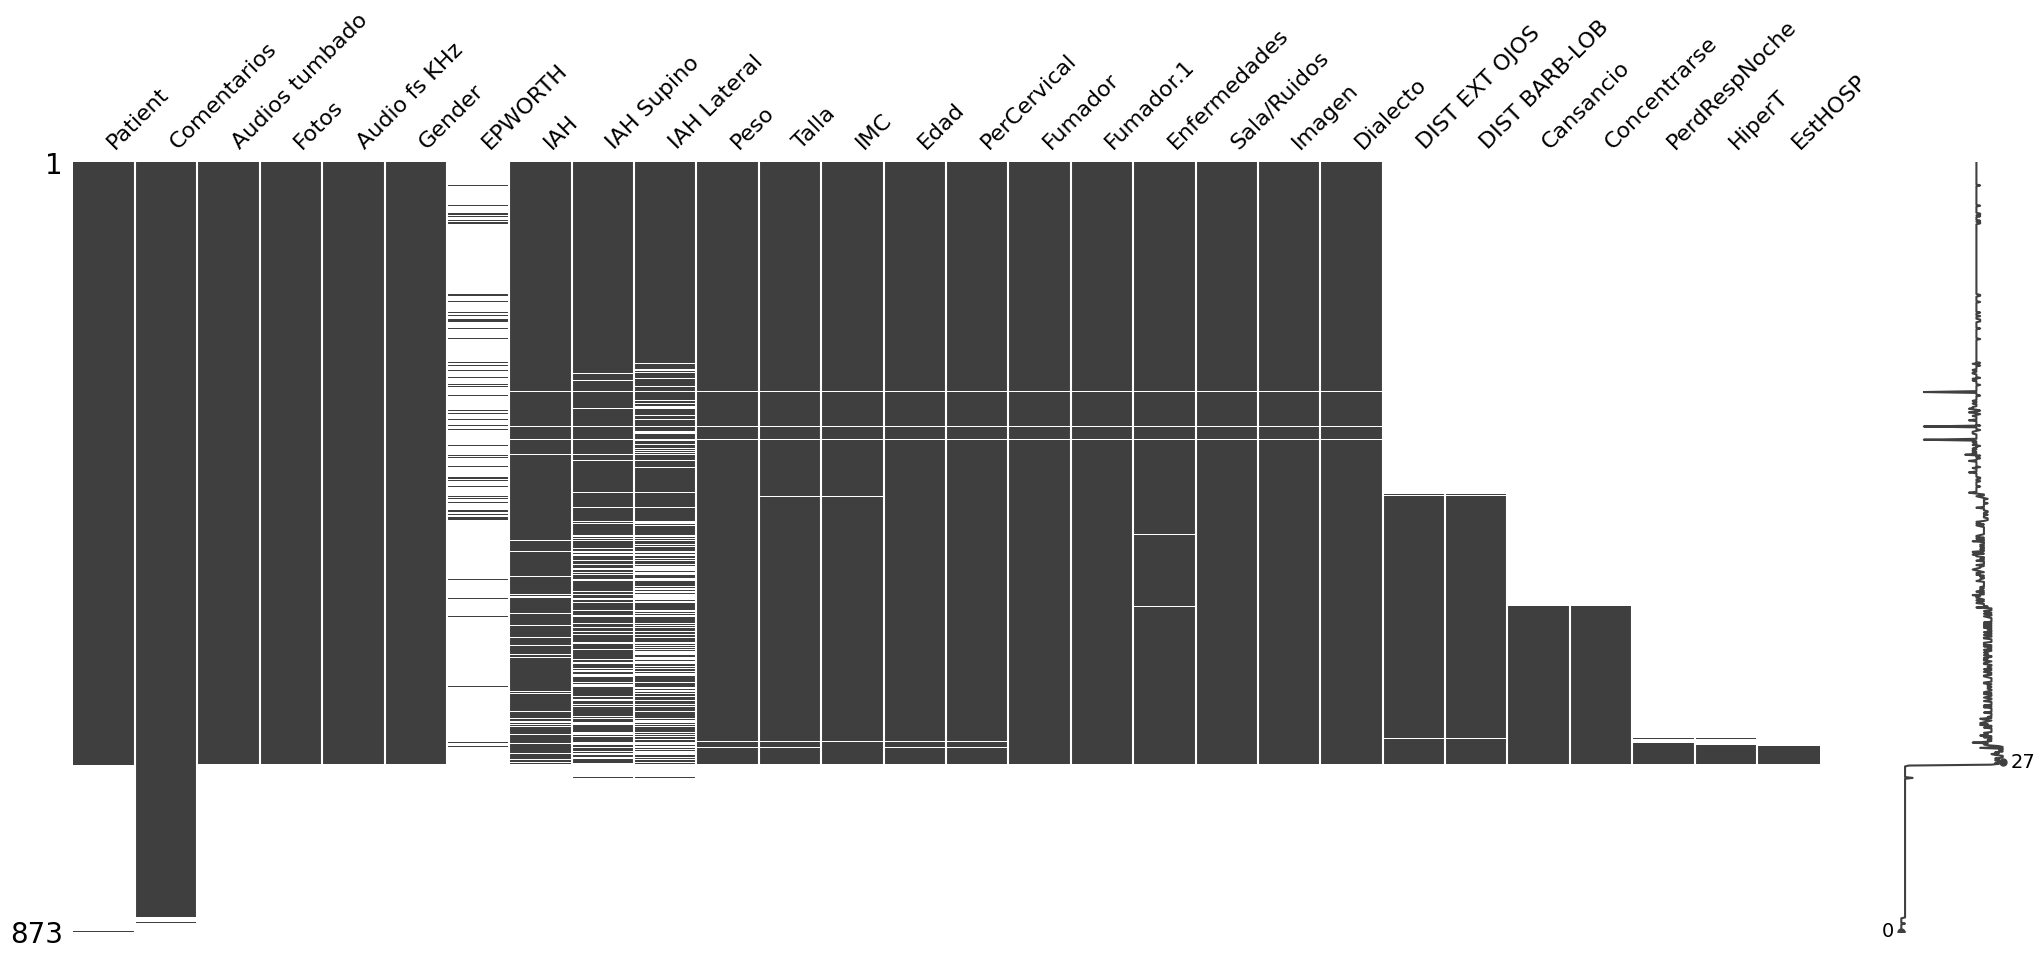

In [ ]:
msno.matrix(df_tmp)

<Axes: >

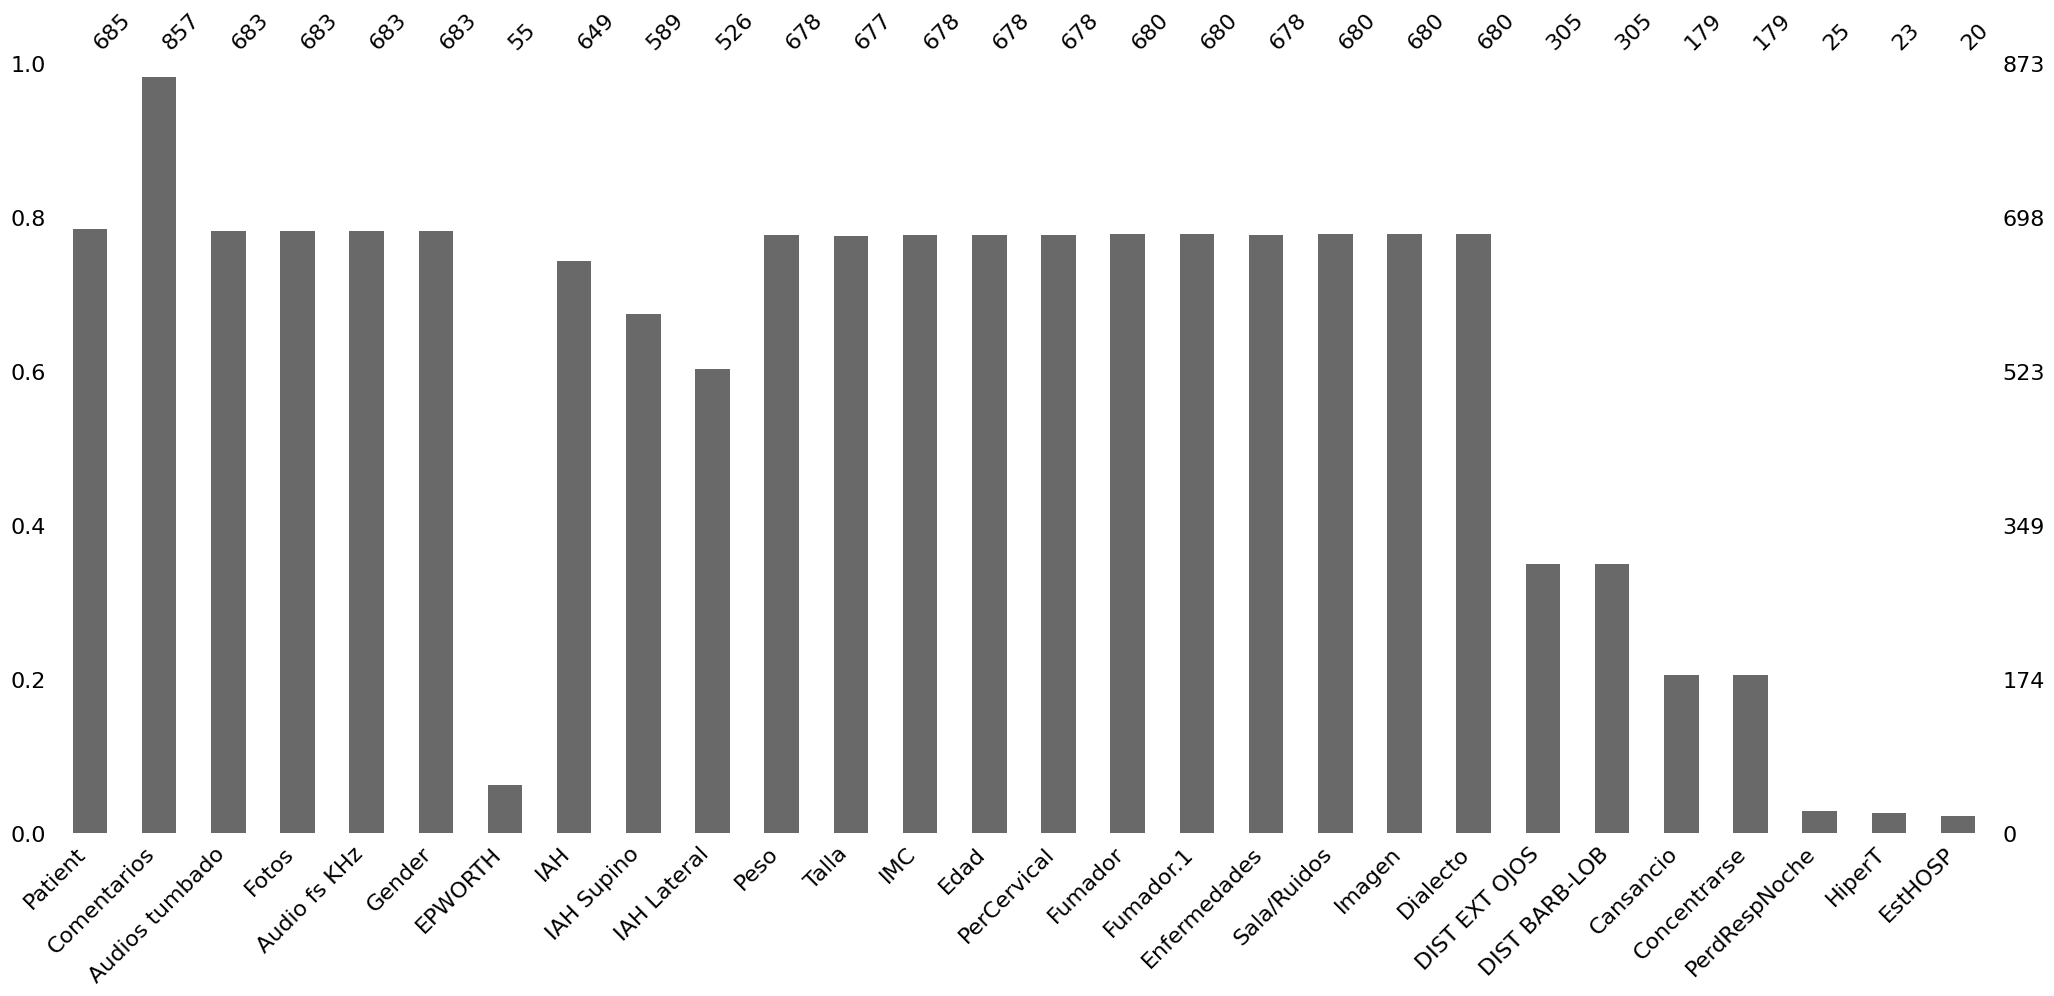

In [ ]:
msno.bar(df_tmp)

### Feature selection

Renaming the columns of our dataframe

In [ ]:
df_tmp = df_tmp.rename(columns = {'Peso': 'Weight', 'Talla': 'Height', 'Edad': 'Age'})

In [ ]:
df_tmp.head(20)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P0006,QMH6,si_codigos,si,16,hombre,NaN,2.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P0007,QMH7,si_codigos,si,16,hombre,NaN,34.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P0008,QMH8,si_codigos,si,16,hombre,NaN,60.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P0009,QMH9,si_codigos,si,16,hombre,NaN,22.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,P0010,QMH10,si_codigos,si,16,hombre,NaN,11.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tmp.describe()

,IAH,Height,IMC,Age,PerCervical,DIST EXT OJOS,HiperT,EstHOSP
count,649.000000,677.000000,678.0,678.000000,678.000000,305.000000,23.000000,20.000000
mean,20.364653,171.144756,-1.0,49.280236,40.188053,9.509630,0.898609,0.600000
std,18.692784,11.661385,0.0,12.851542,5.746654,0.551471,1.975967,0.502625
min,0.000000,-1.000000,-1.0,-1.000000,-1.000000,8.109000,0.000000,0.000000
25%,6.300000,165.000000,-1.0,40.000000,38.000000,9.153000,0.000000,0.000000
50%,14.200000,171.000000,-1.0,49.000000,41.000000,9.444000,1.000000,1.000000
75%,30.000000,178.000000,-1.0,59.000000,43.000000,9.866000,1.000000,1.000000
max,108.600000,199.000000,-1.0,88.000000,53.000000,11.000000,9.668000,1.000000


<Axes: >

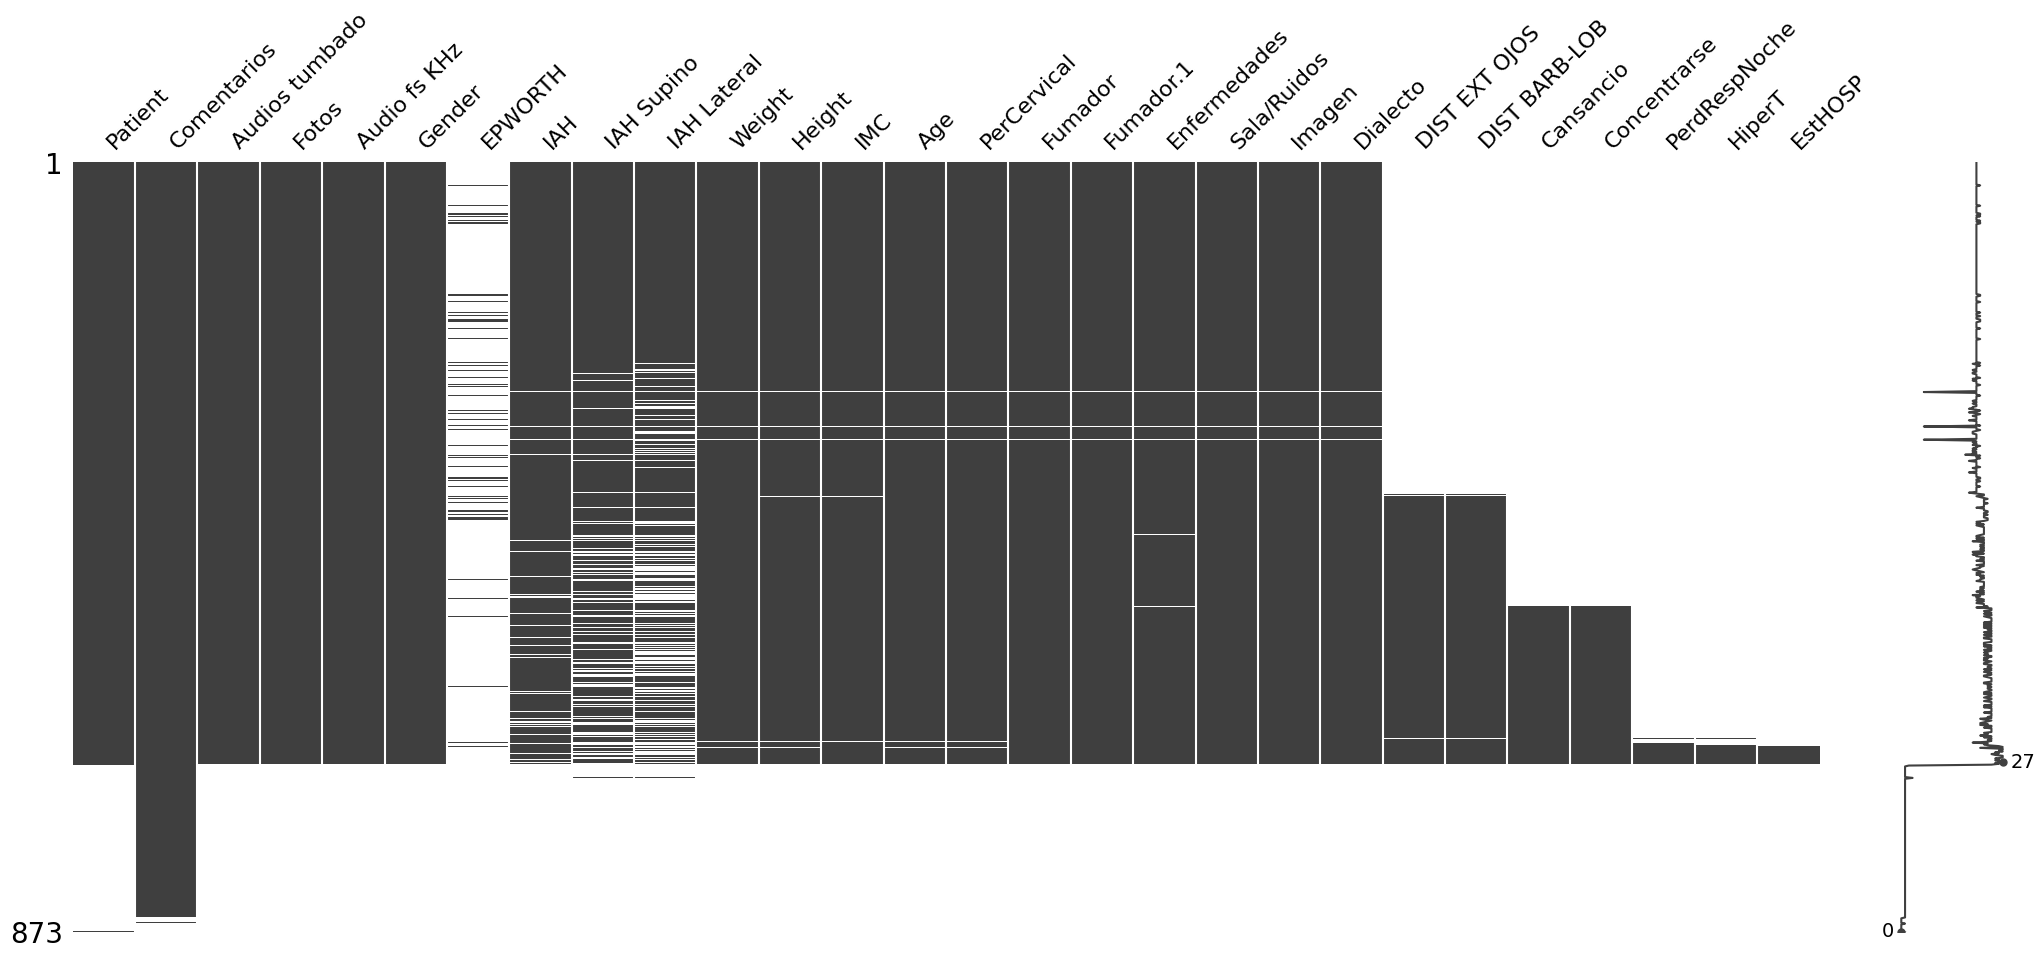

In [ ]:
msno.matrix(df_tmp)

In [ ]:
df_tmp.columns

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Weight',
       'Height', 'IMC', 'Age', 'PerCervical', 'Fumador', 'Fumador.1',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')

<Axes: >

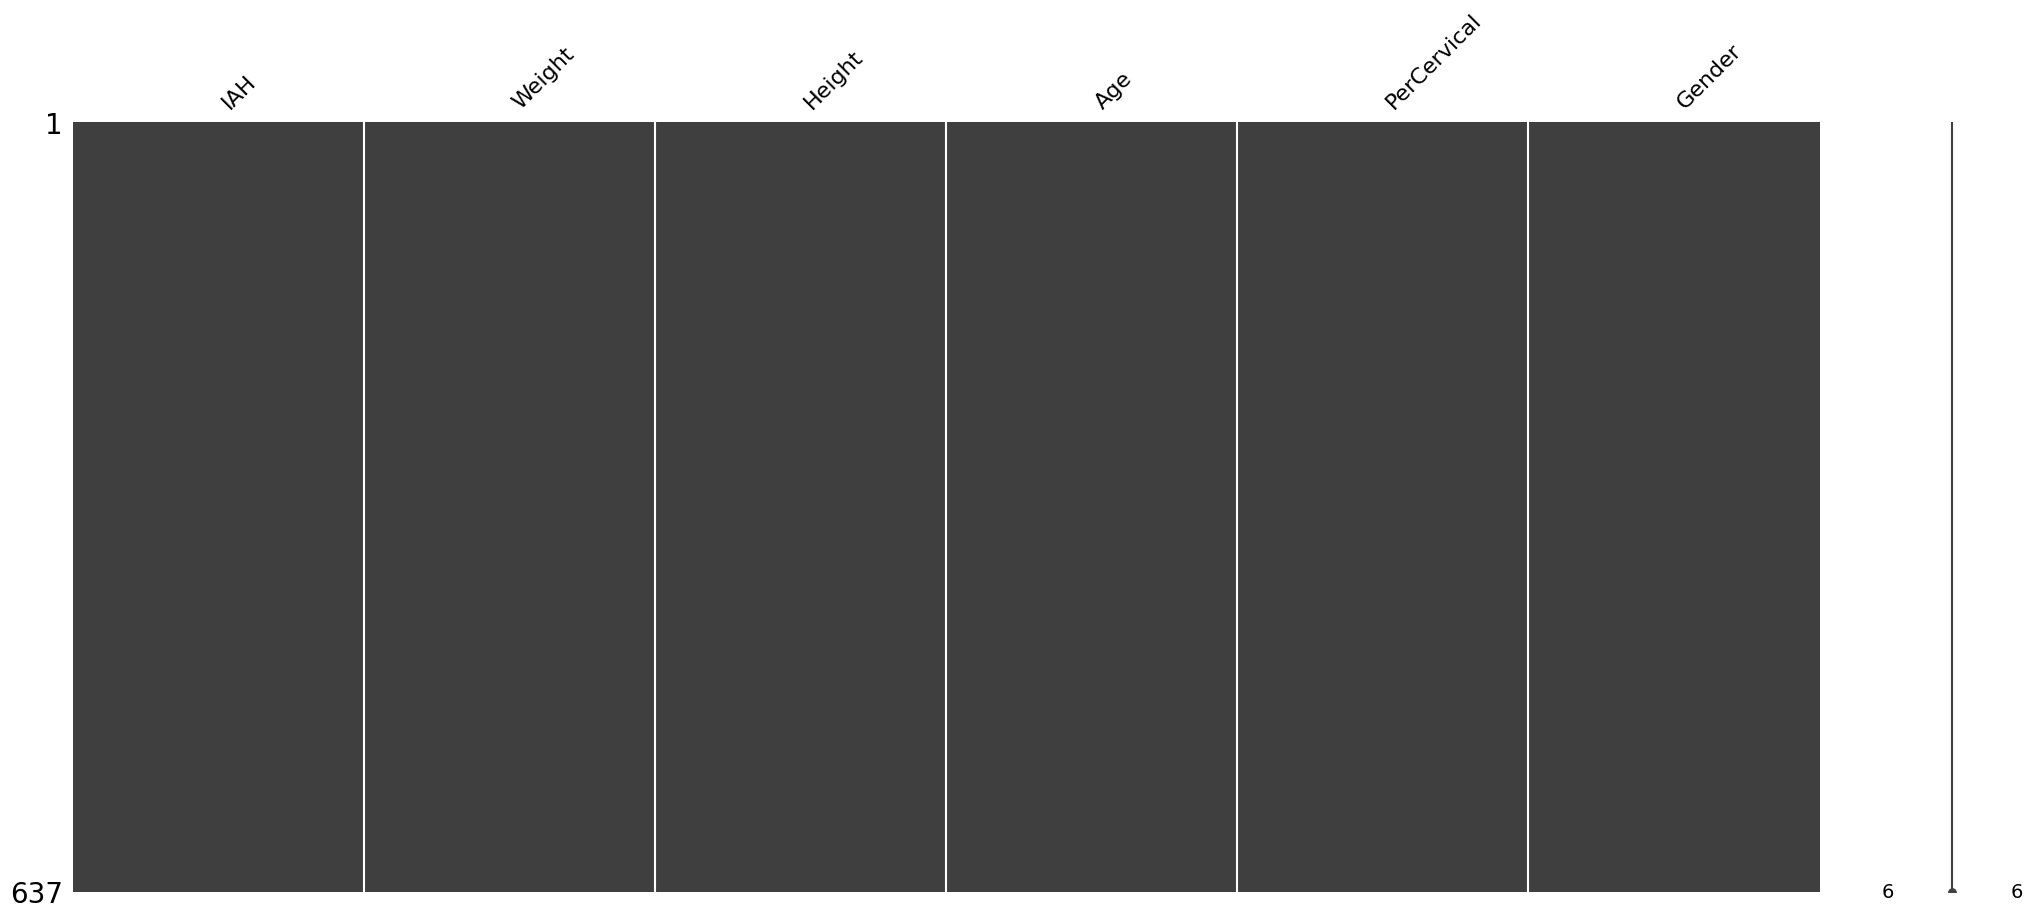

In [ ]:
df_tmp = df_tmp[['IAH', 'Weight', 'Height', 'Age', 'PerCervical', 'Gender']].replace(-1, np.nan)
df_tmp['Weight'] = pd.to_numeric(df_tmp['Weight'], errors='coerce')
df_tmp['Height'] = pd.to_numeric(df_tmp['Height'], errors='coerce')
df_tmp['Age'] = pd.to_numeric(df_tmp['Age'], errors='coerce')
df_tmp['PerCervical'] = pd.to_numeric(df_tmp['PerCervical'], errors='coerce')
df_tmp = df_tmp.dropna()
msno.matrix(df_tmp)

<Axes: >

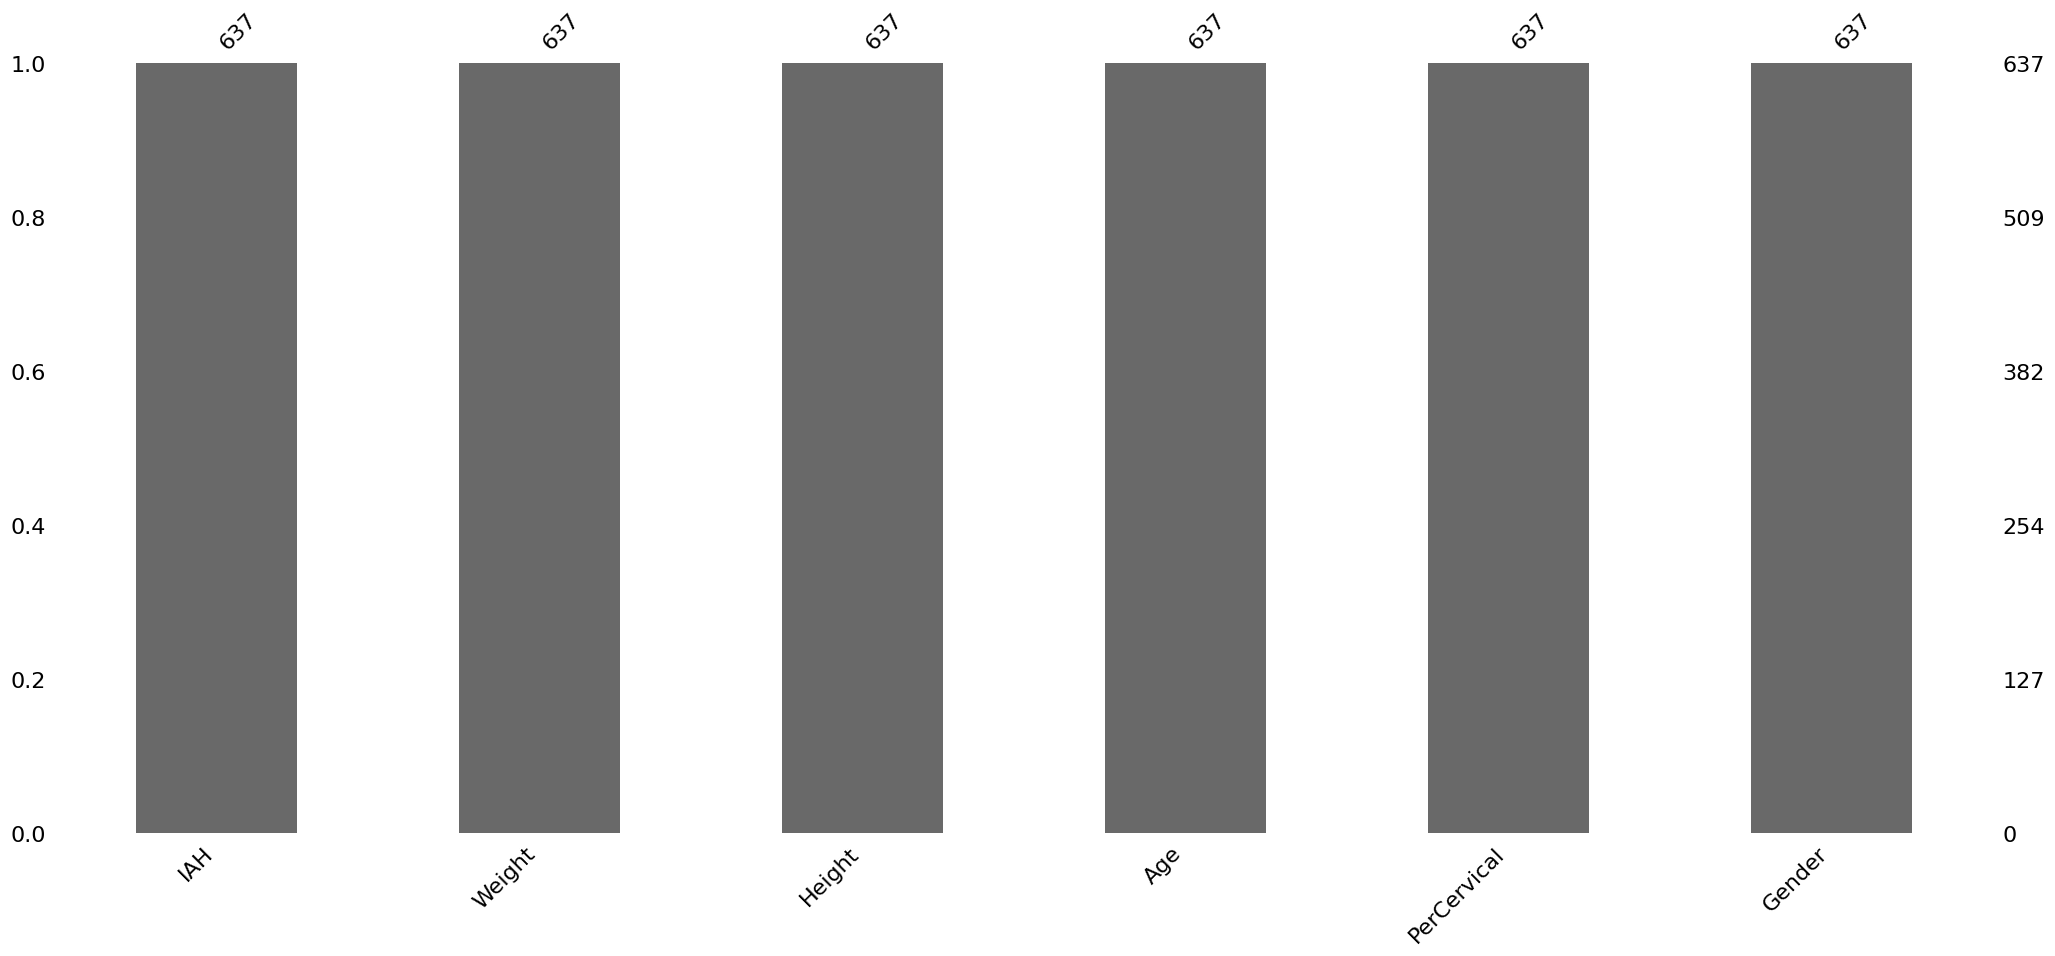

In [ ]:
msno.bar(df_tmp)

In [ ]:
print(df_tmp.dtypes)

IAH            float64
Weight         float64
Height         float64
Age            float64
PerCervical    float64
Gender          object
dtype: object


In [ ]:
df_tmp.head(15)

,IAH,Weight,Height,Age,PerCervical,Gender
1,29.6,119.0,174.0,56.0,48.0,hombre
3,19.7,78.0,168.0,39.0,42.0,hombre
4,9.0,80.0,173.0,32.0,40.0,hombre
5,2.0,109.0,190.0,32.0,42.0,hombre
6,34.0,86.0,169.0,39.0,42.0,hombre
7,60.0,145.0,172.0,47.0,44.0,hombre
8,22.0,72.0,165.0,40.0,42.0,hombre
9,11.0,80.0,180.0,28.0,38.0,hombre
12,3.7,90.0,180.0,36.0,40.0,hombre
13,7.0,50.0,158.0,50.0,35.0,mujer


In [ ]:
df_tmp.describe()

,IAH,Weight,Height,Age,PerCervical
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,20.392716,87.733124,171.284144,49.497645,40.636578
std,18.596944,18.356730,9.558128,12.386418,3.957542
min,0.000000,45.000000,144.000000,20.000000,30.000000
25%,6.400000,75.000000,165.000000,40.000000,38.000000
50%,14.400000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,197.000000,88.000000,53.000000


In [ ]:
df_tmp.to_excel("OSA_DB_UPM.xlsx", index = False)